<a href="https://colab.research.google.com/github/Joe-hyper/DSW8C/blob/main/Hypthyroidism_Test_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Defining the question**

### a) Specifying the question

### b) Defining the metric for success
      Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### c) Understanding the context
      

### d) Recording the experimental design
      * Define the question, the metric for success, the context, experimental design taken.
      * Read and explore the given dataset.
      * Define the appropriateness of the available data to answer the given question.
      * Find and deal with outliers, anomalies, and missing data within the dataset.
      * Build  decision trees, rather you should use at least 2 out of the 3 advanced models 
        * Optimization of the 2 models, making sure to document how you've set up your hyperparameters.
        * Identification of which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
      * Application Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Tuning of parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.
      * Selecting best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.








# **2. Importing Libraries**

In [56]:
# importing necessary libraries
# 

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import  accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

# **3. Reading the Data**

In [25]:
# loading data - hypothyroid
hptodf = pd.read_csv('hypothyroid.csv', na_values = {'?'})

# **4. Checking the Data**

In [26]:
# shape of data
print(f'The dataset has {hptodf.shape[0]} records, and {hptodf.shape[1]} columns.')

The dataset has 3163 records, and 26 columns.


In [27]:
# lets check the info of the dataset
hptodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [28]:
# finding out the data types in our column
hptodf.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [29]:
# checking columns of the dataset
hptodf.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [30]:
# last 5 rows of dataset
hptodf.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,...,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,...,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,...,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [31]:
# statistical summary of dataset
hptodf.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


# **5. Tidying the Data**

In [32]:
# data types
hptodf.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

      Data types of our columns are wrongly presented. Rectification is done below.

In [33]:
# confirming whether duplicates exist
hptodf.duplicated().any().any()

True

In [34]:
# sum of duplicates in our dataset
hptodf.duplicated().sum()

77

In [35]:
# dropping duplicates
hptodf.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,...,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,...,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,...,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,...,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN


In [36]:
# checking for missing values
# defining missing value function
def percent_missing(hptodf):
  # ---------------------
  df = hptodf

  missing = df.isnull().sum().sort_values(ascending=False)

  percent = (df.isnull().sum() / len(df)).sort_values(ascending=False) 

  missing_value_df = pd.DataFrame({'column_name': missing,
                                'percent_missing': percent})
  
  return missing_value_df

In [37]:
# calling out missing value function
percent_missing(hptodf)

,column_name,percent_missing
TBG,2903,0.917800
T3,695,0.219728
TSH,468,0.147961
age,446,0.141005
TT4,249,0.078723
T4U,248,0.078407
FTI,247,0.078090
sex,73,0.023079
TSH_measured,0,0.000000
TBG_measured,0,0.000000


      TBG column has over 90% of its data missing, it therefore has to be dropped.

In [42]:
# dropping tbg column
hptodf.drop(['TBG'],axis=1, inplace=True)

In [46]:
# replacing null values in colmnns with missing data with mean
floatsM = ['TSH','T3', 'TT4', 'T4U', 'FTI', 'age']

for column in floatsM:
  hptodf[column].fillna(hptodf[column].mean(), inplace=True)

hptodf.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

      Data modelling isnt meant to be perfect. We can live with 73 missing records.

In [43]:
# checking for null values
hptodf.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

In [39]:
# Checking for unique values in each column
# 

for column in hptodf.columns:
  print(column)
  print(hptodf[column].nunique())
  print(hptodf[column].unique())


status
2
['hypothyroid' 'negative']
age
92
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]
sex
2
['M' 'F' nan]
on_thyroxine
2
['f' 't']
query_on_thyroxine
2
['f' 't']
on_antithyroid_medication
2
['f' 't']
thyroid_surgery
2
['f' 't']
query_hypothyroid
2
['f' 't']
query_hyperthyroid
2
['f' 't']
pregnant
2
['f' 't']
sick
2
['f' 't']
tumor
2
['f' 't']
lithium
2
['f' 't']
goitre
2
['f' 't']
TSH_measured
2
['y' 'n']
TSH
239
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 

In [53]:
# streamlining data types
hptodf['age'] = hptodf['age'].astype(float)
hptodf['TSH'] = hptodf['TSH'].astype(float)
hptodf['T3'] = hptodf['T3'].astype(float)
hptodf['TT4'] = hptodf['TT4'].astype(float)
hptodf['FTI'] = hptodf['FTI'].astype(float)
hptodf.info()

KeyError: ignored

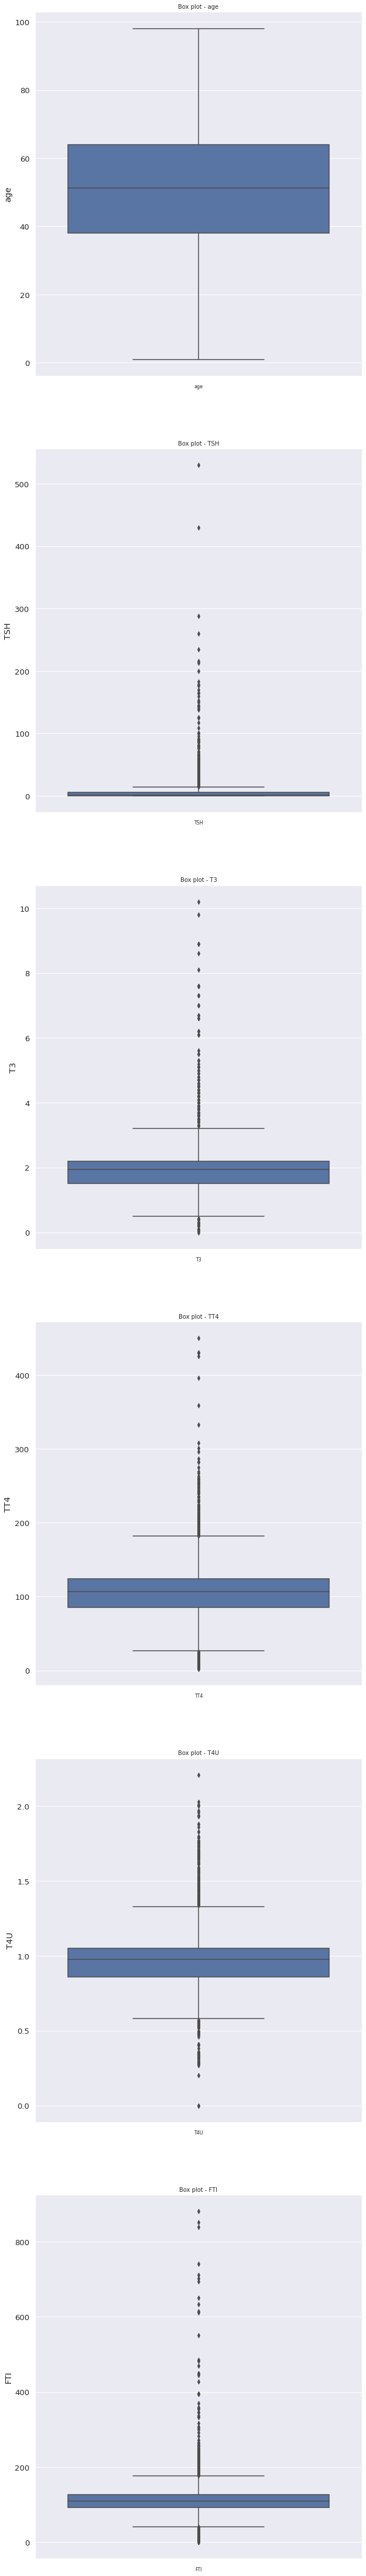

In [58]:
# lets check for outliers
col_names = ['age', 'TSH', 'T3',  'TT4', 'T4U', 'FTI']

fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hptodf[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

      Since this is a medical report;outliers shall not be dropped. As it is understandable that some individuals will have high levels of thyroid activity.

In [47]:
hptodf.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

# **6. Analysis**

### **a) Univariate Analysis**

### i) Categorical variables

In [59]:
# lets get a list of our categorical columns
categorical = list(hptodf.select_dtypes(include = ['object']).columns)
categorical

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [60]:
# categorical variables
# defining function for categorical plots
# Categorical Plots
def CatPlots(column, hptodf):
  fig,ax  = plt.subplots(figsize = (10,5))
  sns.countplot(hptodf[column], palette = 'flare', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)

  plt.show()

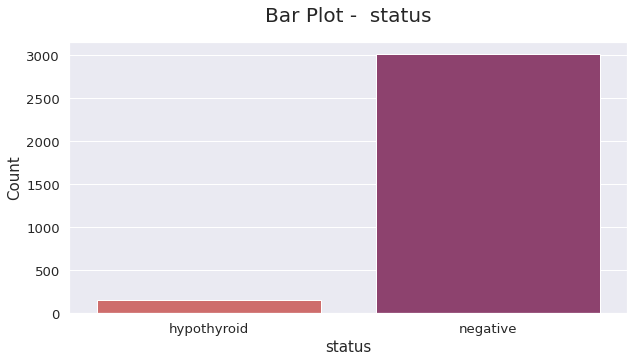

In [62]:
# 
CatPlots('status', hptodf);

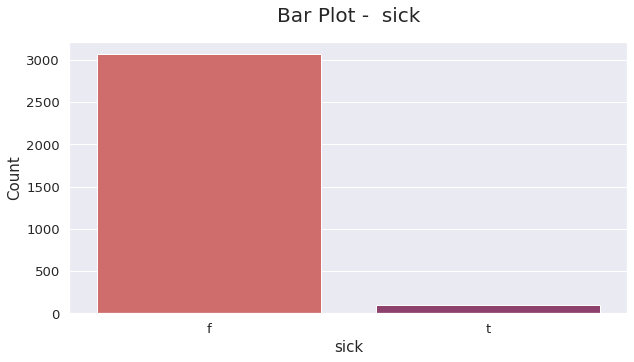

In [63]:
# 
CatPlots('sick', hptodf);

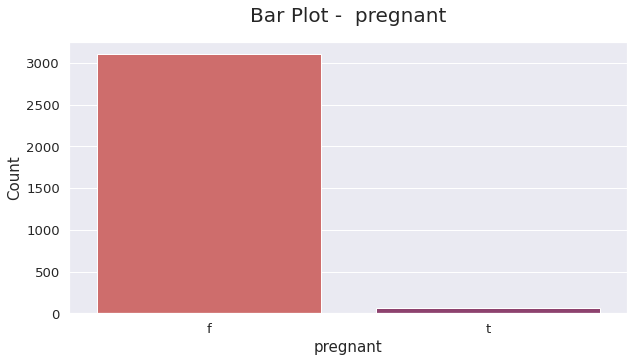

In [64]:
# 
CatPlots('pregnant', hptodf);

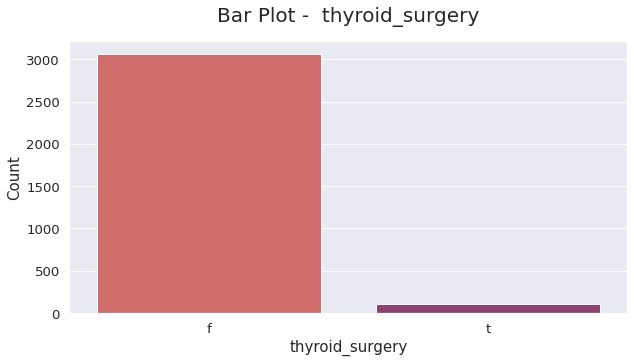

In [65]:
# 
CatPlots('thyroid_surgery', hptodf);

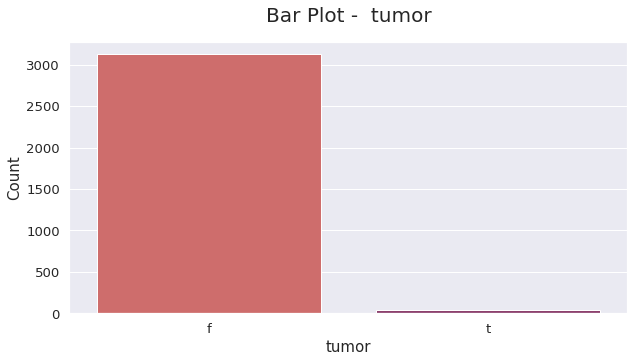

In [67]:
# 
CatPlots('tumor', hptodf);

### ii)Numerical variables

In [71]:
# lets get a list of our numerical columns
numerical = list(hptodf.select_dtypes(include = ['integer',  'float']).columns)
numerical

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

**Measures of central tendency**

In [72]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, hptodf):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {hptodf[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {hptodf[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {hptodf[column].mode()}")

In [ ]:
# Mean
MeasureCentral('mean', numerical, hptodf)

In [ ]:
# Median
MeasureCentral('median', numerical, hptodf)

**Measures of dispersion**

In [73]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, hptodf):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {hptodf[column].max() - hptodf[column].min()}")
    elif measure == 'IQR':
      Q1 = hptodf[column].quantile(0.25)
      Q3 = hptodf[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {hptodf[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {hptodf[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {hptodf[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {hptodf[column].kurt()}")

In [74]:
# Range
MeasureDistribution('range', numerical, hptodf)

age column range = 97.0
TSH column range = 530.0
T3 column range = 10.2
TT4 column range = 448.0
T4U column range = 2.21
FTI column range = 881.0


In [75]:
# iqr
MeasureDistribution('IQR', numerical, hptodf)

age column IQR = 26.0
TSH column IQR = 5.923179962894247
T3 column IQR = 0.7000000000000002
TT4 column IQR = 39.0
T4U column IQR = 0.19000000000000006
FTI column IQR = 34.0


In [77]:
# variance
MeasureDistribution('var', numerical, hptodf)

age column variance = 319.76482740269773
TSH column variance = 486.64489122320987
T3 column variance = 0.7751757255681109
TT4 column variance = 1906.0004949398922
T4U column variance = 0.047311778809902214
FTI column variance = 3345.341428055348


In [76]:
# kurtosis
MeasureDistribution('kurt', numerical, hptodf)

age column kurt = -0.6256199462873231
TSH column kurt = 180.09730790095531
T3 column kurt = 14.017702957694745
TT4 column kurt = 7.810265536151154
T4U column kurt = 3.963176099482811
FTI column kurt = 51.46404577439534


### b) **Bivariate Analysis**

i) Numerical - Numerical variables

In [78]:
# Bar plot function
def BarPlotBiv(x,y, housedf):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(housedf[x], housedf[y])
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

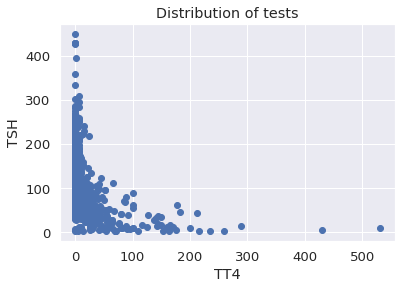

In [86]:
#lets plot a scatter plot
plt.scatter(hptodf["TSH"] , hptodf["TT4"])

# title
plt.title('Distribution of tests')

# x axis
plt.xlabel('TT4')

# y axis
plt.ylabel('TSH')


# viz scatter plot
plt.show()

        Low levels of TT4 and high levels of TSH is an indicator that one has hypothyroidism. Therfore, the scatter plot can help us give some sort of birds eye view on the situation.

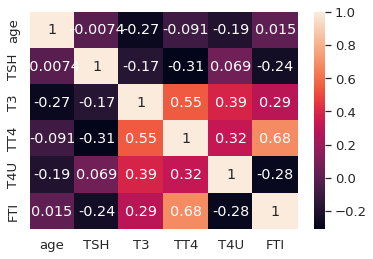

In [87]:
# heatmap showing correlation of numerical variables
sns.heatmap(hptodf.corr(),annot=True)
plt.show()

      Most correlations are low. This is understable as, this are numerous tests that just give an indication,

# **7. Implementing the solution**

## **7a) Modelling**

### i) Random Forest 

In [88]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroidisim or not, so we'll use the status column as our Y 

y = np.where(hptodf.status == 'hypothyroid', 1, 0)


test_features = hptodf.columns.to_list()
test_features.remove('status')

X = hptodf[test_features]
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# We set our parameters, min_samples_split or max_depth

forest = RandomForestClassifier(random_state=42)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.041074,0.041074
std,0.198619,0.198619
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [89]:
# To check the performance of our model
# 

print('The accuracy score is :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


The accuracy score is : 0.981042654028436
[[601   6]
 [  6  20]]


In [90]:
# to assess the performance of our random forest
# 

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018957345971563982
Mean Squared Error: 0.018957345971563982
Root Mean Squared Error: 0.13768567816430285


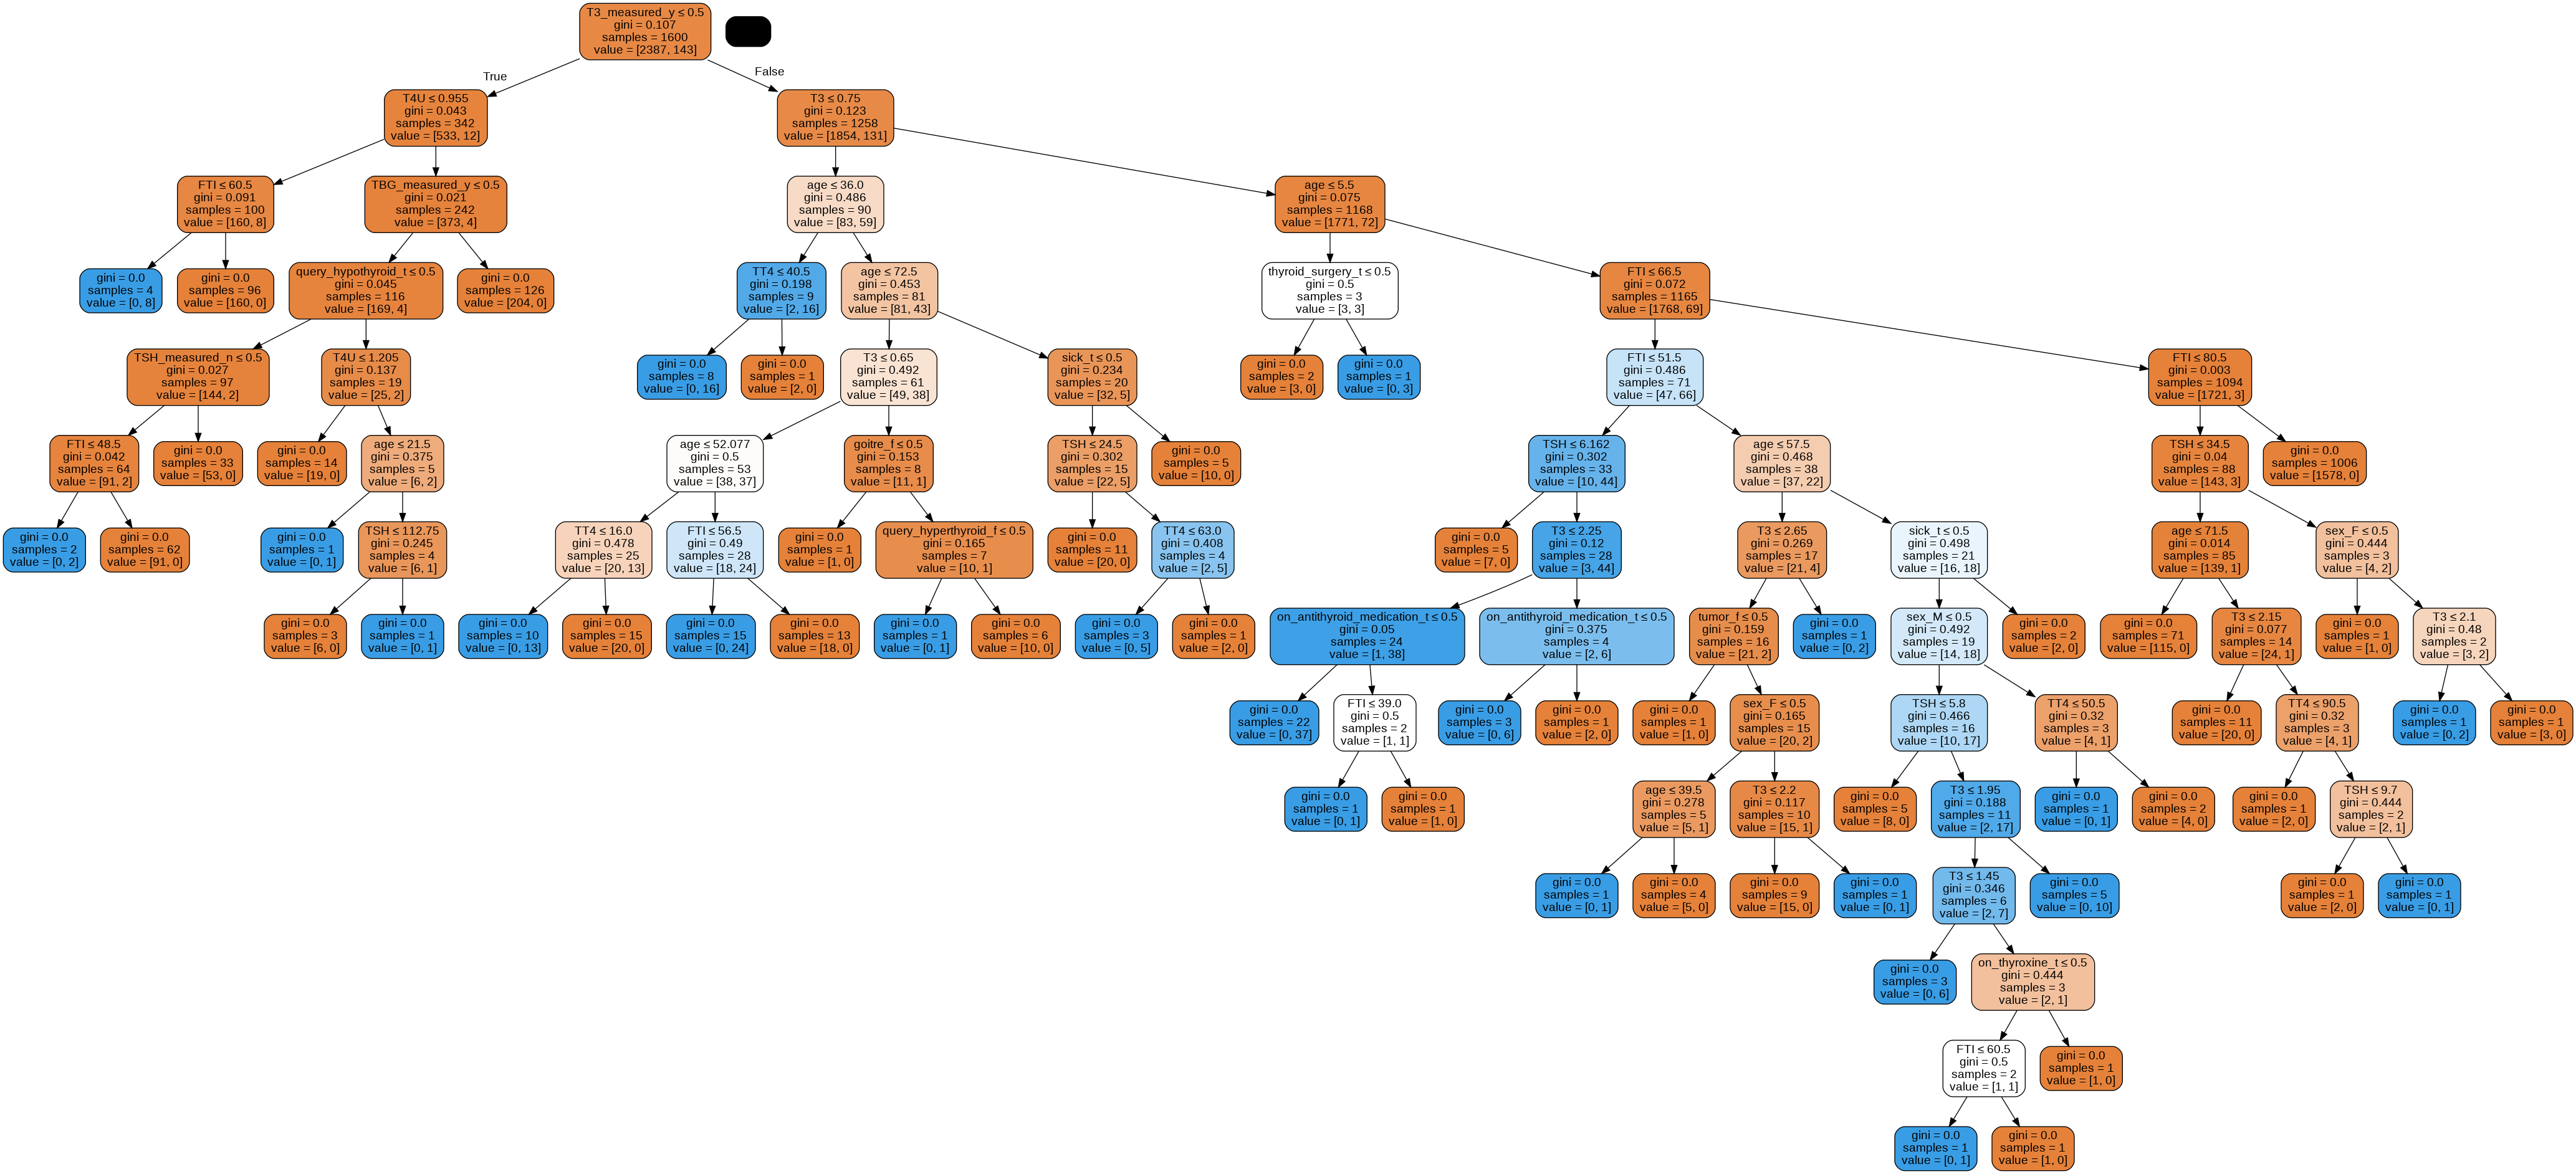

In [91]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[75]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

In [92]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
FI = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
FI


,importance
feature,
TSH,0.2997
FTI,0.2856
TT4,0.2135
T3,0.0658
T4U,0.0371
age,0.0319
on_thyroxine_t,0.0054
query_hypothyroid_f,0.0050
on_thyroxine_f,0.0045


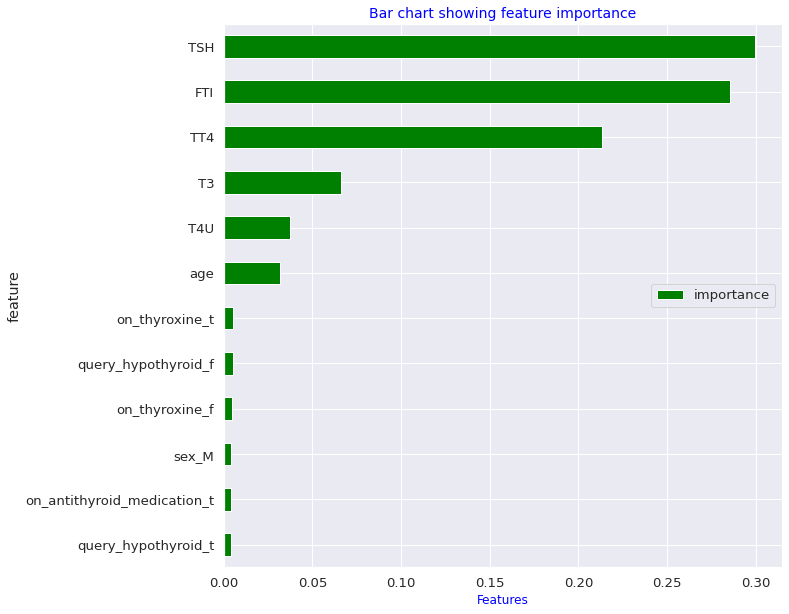

In [93]:
# Creating a bar chart of feature importance in descending order
#
FI = FI[:12].sort_values(by = 'importance', ascending = True)
FI.plot(kind = 'barh', figsize = (10, 10), color = 'green')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'blue', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'blue')
plt.show()